<a href="https://colab.research.google.com/github/rajansingh387/deep_learning-and-neural-networks/blob/main/first_Implementation_of_ANN_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
print(tf.__version__)

2.13.0


In [3]:
print(pd.__version__)

1.5.3


In [4]:
tf.config.list_physical_devices('gpu')

[]

In [5]:
tf.config.list_physical_devices('cpu')

[]

In [17]:
mnist= tf.keras.datasets.mnist

In [18]:
(xtrainf,ytrainf),(xtest,ytest)= mnist.load_data()

In [19]:
xtrainf.shape

(60000, 28, 28)

In [20]:
xtest.shape

(10000, 28, 28)

In [21]:
xtrainf[0].shape

(28, 28)

In [22]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
x_valid,xtrain= xtrainf[:5000]/255., xtrainf[5000:]/255.
y_valid,ytrain= ytrainf[:5000],ytrainf[5000:]

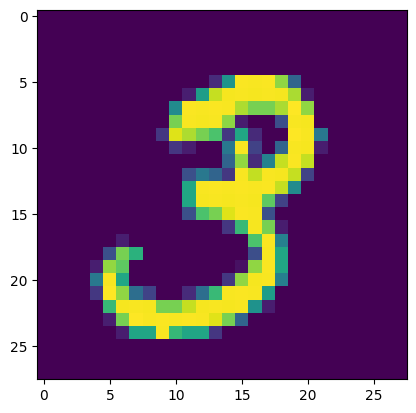

In [30]:
plt.imshow(xtrain[1])
plt.show()

<Axes: >

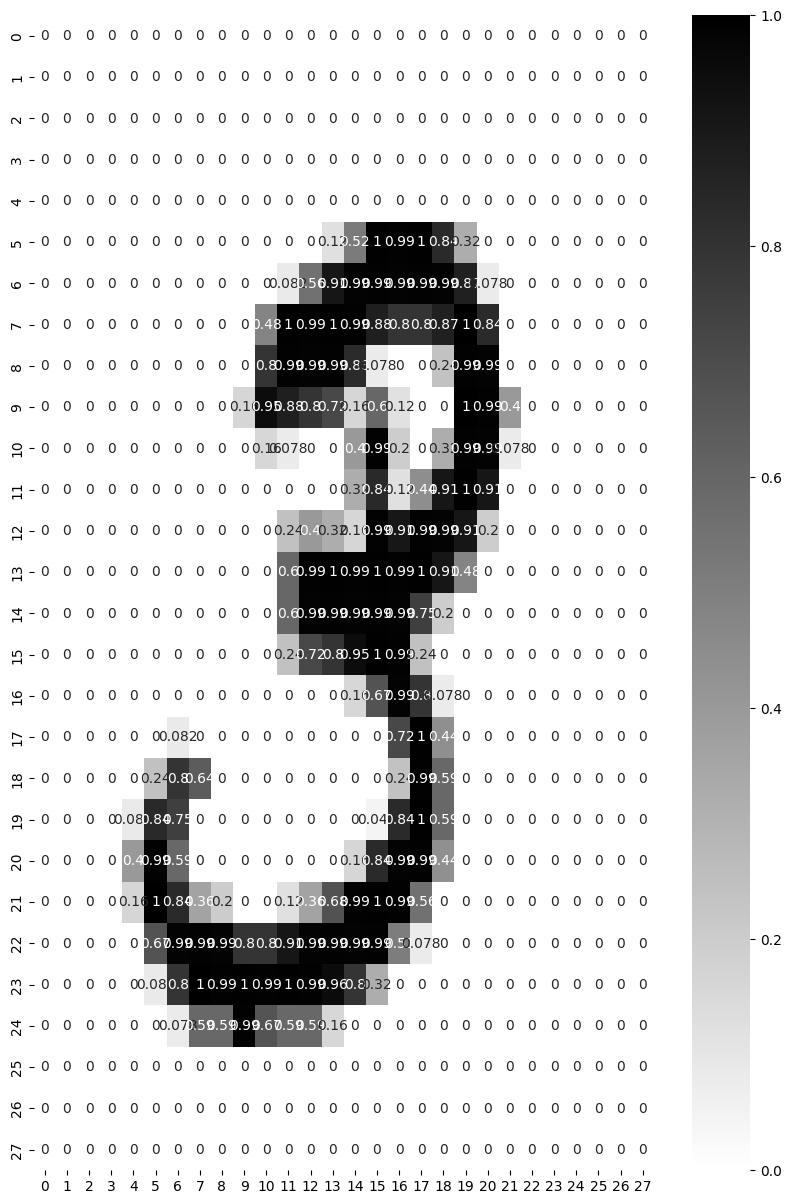

In [35]:
plt.figure(figsize=(10,15))
sns.heatmap(xtrain[1], annot= True,cmap = 'binary')


In [38]:
28*28

784

In [43]:
layers= [tf.keras.layers.Flatten(input_shape=[28,28],name='inputlayer'),
         tf.keras.layers.Dense(300, activation='relu',name='hiddenLayer1'),
         tf.keras.layers.Dense(100,activation='relu',name='hiddenLayer2'),
         tf.keras.layers.Dense(10,activation='softmax',name='outputLayer')]

 '''Dense is a fully connected layer in a neural network. It means that each neuron in this layer is connected to every
 neuron in the previous layer. This layer has 300 neurons.   '''
''' A sequential model is a linear stack of layers. The layers are added one by one in the order they are defined.'''

In [44]:
model_clf= tf.keras.models.Sequential(layers)

In [45]:
model_clf.layers

In [47]:
model_clf.summary()
#784*300+300

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hidden1 = model_clf.layers[1]
hidden1.name

In [51]:
hidden1= model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [52]:
hidden1.get_weights()

[array([[ 0.02735452,  0.00081759, -0.061048  , ...,  0.04853052,
         -0.02834387,  0.07315245],
        [ 0.0023442 , -0.04891194,  0.04590995, ...,  0.05314642,
          0.01960897,  0.00171314],
        [ 0.05471997, -0.06616071, -0.03307434, ..., -0.01394085,
          0.01118279, -0.00139397],
        ...,
        [-0.04178467,  0.05556558, -0.02720715, ..., -0.04915732,
         -0.01374334, -0.00753187],
        [ 0.01341569,  0.03454582,  0.04198949, ...,  0.05849475,
          0.03952821, -0.07135673],
        [ 0.06242263,  0.0710094 , -0.04091786, ...,  0.05109008,
          0.01113115, -0.0468193 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [54]:
len(hidden1.get_weights()[1])

300

In [55]:
wights,bias= hidden1.get_weights()

In [56]:
wights.shape

(784, 300)

In [57]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [58]:
EPOCHS = 30
VALIDATION_SET = (x_valid, y_valid)

history = model_clf.fit(xtrain, ytrain, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6074 - accuracy: 0.8413 - val_loss: 0.3009 - val_accuracy: 0.9158
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2900 - accuracy: 0.9164 - val_loss: 0.2391 - val_accuracy: 0.9332
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2382 - accuracy: 0.9323 - val_loss: 0.2009 - val_accuracy: 0.9436
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2041 - accuracy: 0.9414 - val_loss: 0.1778 - val_accuracy: 0.9492
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1783 - accuracy: 0.9484 - val_loss: 0.1608 - val_accuracy: 0.9536
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1580 - accuracy: 0.9548 - val_loss: 0.1465 - val_accuracy: 0.9600
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1419 - accuracy: 0.9599 - val_loss: 0.1296 - val_accuracy:

In [59]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [60]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.607392,0.841291,0.300889,0.9158
1,0.289992,0.916418,0.239084,0.9332
2,0.238242,0.932255,0.200917,0.9436
3,0.204101,0.941418,0.177753,0.9492
4,0.178308,0.948364,0.160813,0.9536
5,0.158027,0.954764,0.146506,0.9600
6,0.141939,0.959927,0.129584,0.9642
7,0.127931,0.963582,0.120546,0.9658
8,0.116352,0.967418,0.117645,0.9666
9,0.106395,0.970236,0.105992,0.9692


<Axes: >

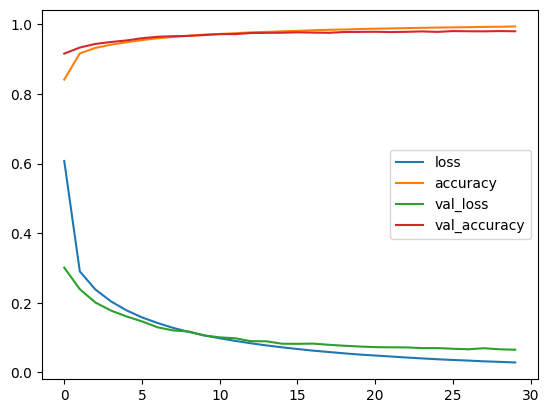

In [61]:
pd.DataFrame(history.history).plot()

In [62]:
model_clf.evaluate(xtest,ytest)

313/313 [==============================] - 3s 6ms/step - loss: 13.1488 - accuracy: 0.9756


[13.148762702941895, 0.975600004196167]

In [63]:
x_new= xtest[:5]

In [65]:
actual= ytest[:5]
actual

array([7, 2, 1, 0, 4], dtype=uint8)

In [66]:
yprob= model_clf.predict(x_new)

1/1 [==============================] - 1s 951ms/step


In [67]:
yprob

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [69]:
y_pred = np.argmax(yprob, axis = -1)

In [70]:
y_pred

array([7, 2, 1, 0, 4])

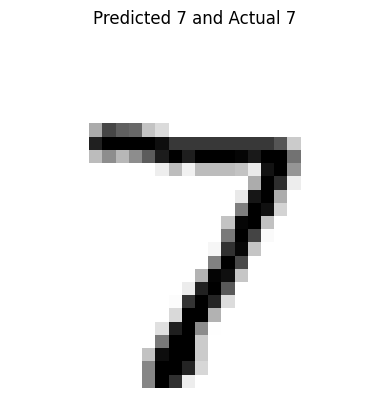

######################


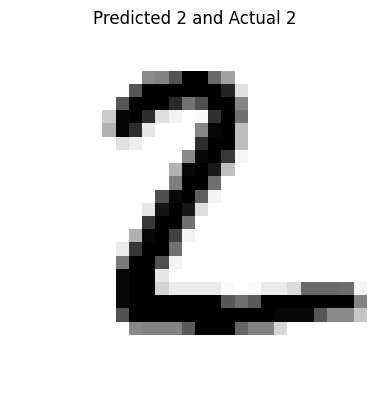

######################


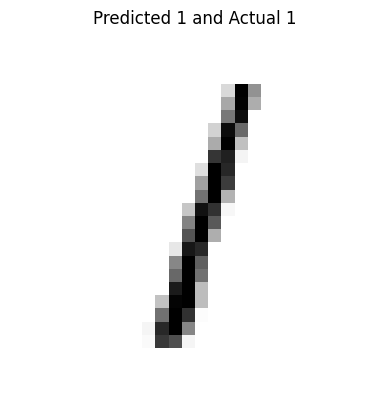

######################


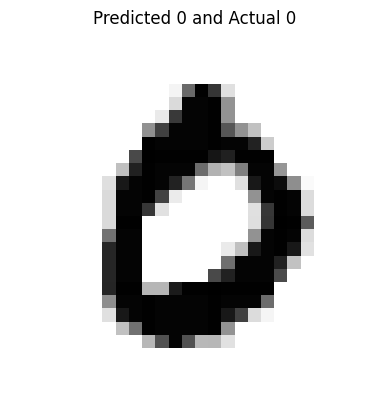

######################


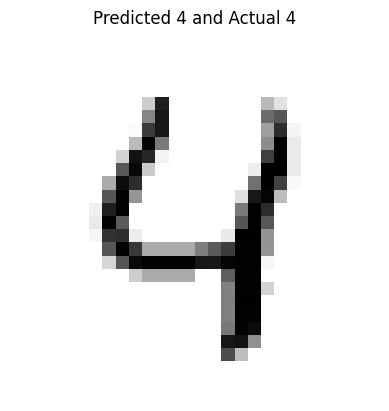

######################


In [71]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################")